In [107]:
pip install google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client pandas matplotlib seaborn requests

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
from googleapiclient.discovery import build

# Load the API key from the environment variable
api_key = os.getenv('YOUTUBE_API_KEY')

if api_key is None:
    raise ValueError("API key not found. Set the YOUTUBE_API_KEY environment variable.")

# Build the YouTube service
youtube = build('youtube', 'v3', developerKey=api_key)


In [109]:
def search_kenyan_channels(query, max_results=50):
    # Use the search.list method to find channels related to the query
    request = youtube.search().list(
        q=query,
        type='channel',
        part='snippet',
        maxResults=max_results
    )
    response = request.execute()
    
    # Extract relevant information from the response
    channels = []
    for item in response['items']:
        channel_info = {
            'channelId': item['snippet']['channelId'],
            'channelTitle': item['snippet']['title'],
            'description': item['snippet']['description'],
            'publishedAt': item['snippet']['publishedAt']
        }
        channels.append(channel_info)
    
    return pd.DataFrame(channels)

# Example: Searching for Kenyan content
df_channels = search_kenyan_channels('Kenya')
print(df_channels.head())


                  channelId  \
0  UCLEbibgwOY787d16dXshmbg   
1  UCXuseB7juWB7DIgTJcwtHFQ   
2  UCBXe79nnuPRYci4acLafjHA   
3  UCn0gL0gaCE9Moxe0UFIruzw   
4  UCR3vMYVjtOA9vg_gLnjU9Aw   

                                        channelTitle  \
0              Judicial Service Commission of Kenya    
1                                Parliament of Kenya   
2                                 Auto Konnekt Kenya   
3  Betty's Stories From Kenya(Истории Бетти из Ке...   
4                                 twinshangout kenya   

                                         description           publishedAt  
0  The Judicial Service Commission (JSC) of Kenya...  2022-09-20T10:12:37Z  
1  This is the official Parliament of Kenya YouTu...  2017-04-01T18:36:16Z  
2  We are all about cars. An alluring motor vehic...  2024-03-16T09:33:42Z  
3  Привет ! Меня зовут Беатрис ,я кенийка .Этот б...  2021-01-07T18:19:32Z  
4  Hello, our good names are Maren and Maureen. W...  2016-03-31T19:32:29Z  


In [110]:
def get_channel_statistics(channel_ids):
    # Fetch detailed statistics for each channel ID
    request = youtube.channels().list(
        part='snippet,statistics',
        id=','.join(channel_ids)
    )
    response = request.execute()
    
    # Extract channel details
    channel_data = []
    for item in response['items']:
        data = {
            'channelId': item['id'],
            'title': item['snippet']['title'],
            'description': item['snippet']['description'],
            'subscriberCount': item['statistics'].get('subscriberCount', 0),
            'viewCount': item['statistics'].get('viewCount', 0),
            'videoCount': item['statistics'].get('videoCount', 0),
            'publishedAt': item['snippet']['publishedAt']
        }
        channel_data.append(data)
    
    return pd.DataFrame(channel_data)

# Example: Fetch detailed statistics for the first 5 channels
channel_ids = df_channels['channelId'].head(5).tolist()
df_channel_stats = get_channel_statistics(channel_ids)
print(df_channel_stats.head())


                  channelId  \
0  UCBXe79nnuPRYci4acLafjHA   
1  UCLEbibgwOY787d16dXshmbg   
2  UCn0gL0gaCE9Moxe0UFIruzw   
3  UCXuseB7juWB7DIgTJcwtHFQ   
4  UCR3vMYVjtOA9vg_gLnjU9Aw   

                                               title  \
0                                 Auto Konnekt Kenya   
1              Judicial Service Commission of Kenya    
2  Betty's Stories From Kenya(Истории Бетти из Ке...   
3                                Parliament of Kenya   
4                                 twinshangout kenya   

                                         description subscriberCount  \
0  We are all about cars. An alluring motor vehic...           32500   
1  The Judicial Service Commission (JSC) of Kenya...            2150   
2  Привет ! Меня зовут Беатрис ,я кенийка .Этот б...           27100   
3  This is the official Parliament of Kenya YouTu...           68200   
4  Hello, our good names are Maren and Maureen. W...           42000   

  viewCount videoCount                  pub

In [111]:
# Convert columns to numeric values
df_channel_stats['subscriberCount'] = pd.to_numeric(df_channel_stats['subscriberCount'], errors='coerce')
df_channel_stats['viewCount'] = pd.to_numeric(df_channel_stats['viewCount'], errors='coerce')
df_channel_stats['videoCount'] = pd.to_numeric(df_channel_stats['videoCount'], errors='coerce')

# Handle missing data (if any)
df_channel_stats.dropna(inplace=True)

# Display the cleaned data
print(df_channel_stats.describe())


       subscriberCount     viewCount   videoCount
count         5.000000  5.000000e+00     5.000000
mean      34390.000000  3.656930e+06   518.600000
std       23964.358952  2.897646e+06   720.949582
min        2150.000000  2.253860e+05    39.000000
25%       27100.000000  1.122964e+06   138.000000
50%       32500.000000  4.772882e+06   273.000000
75%       42000.000000  4.989815e+06   353.000000
max       68200.000000  7.173603e+06  1790.000000


In [112]:
df_channel_stats.to_csv('kenya_youtube_channels.csv', index=False)


In [113]:
# Read the CSV file
df_channel_stats = pd.read_csv('kenya_youtube_channels.csv')

# Print the DataFrame
print(df_channel_stats)

                  channelId  \
0  UCBXe79nnuPRYci4acLafjHA   
1  UCLEbibgwOY787d16dXshmbg   
2  UCn0gL0gaCE9Moxe0UFIruzw   
3  UCXuseB7juWB7DIgTJcwtHFQ   
4  UCR3vMYVjtOA9vg_gLnjU9Aw   

                                               title  \
0                                 Auto Konnekt Kenya   
1              Judicial Service Commission of Kenya    
2  Betty's Stories From Kenya(Истории Бетти из Ке...   
3                                Parliament of Kenya   
4                                 twinshangout kenya   

                                         description  subscriberCount  \
0  We are all about cars. An alluring motor vehic...            32500   
1  The Judicial Service Commission (JSC) of Kenya...             2150   
2  Привет ! Меня зовут Беатрис ,я кенийка .Этот б...            27100   
3  This is the official Parliament of Kenya YouTu...            68200   
4  Hello, our good names are Maren and Maureen. W...            42000   

   viewCount  videoCount             

In [114]:
# Remove duplicate rows based on all columns
df_channel_stats.drop_duplicates(inplace=True)
# Replace infinite values with NaN
import numpy as np
df_channel_stats.replace([np.inf, -np.inf], np.nan, inplace=True)
# Optionally drop rows with NaN values
df_channel_stats.dropna(inplace=True)

In [115]:
df_channel_stats.rename(columns={
    'channelId': 'Channel ID',
    'title': 'Channel Title',
    'subscriberCount': 'Subscribers',
    'viewCount': 'Views',
    'videoCount': 'Videos'
}, inplace=True)
print(df_channel_stats.head())

                 Channel ID  \
0  UCBXe79nnuPRYci4acLafjHA   
1  UCLEbibgwOY787d16dXshmbg   
2  UCn0gL0gaCE9Moxe0UFIruzw   
3  UCXuseB7juWB7DIgTJcwtHFQ   
4  UCR3vMYVjtOA9vg_gLnjU9Aw   

                                       Channel Title  \
0                                 Auto Konnekt Kenya   
1              Judicial Service Commission of Kenya    
2  Betty's Stories From Kenya(Истории Бетти из Ке...   
3                                Parliament of Kenya   
4                                 twinshangout kenya   

                                         description  Subscribers    Views  \
0  We are all about cars. An alluring motor vehic...        32500  1122964   
1  The Judicial Service Commission (JSC) of Kenya...         2150   225386   
2  Привет ! Меня зовут Беатрис ,я кенийка .Этот б...        27100  4989815   
3  This is the official Parliament of Kenya YouTu...        68200  7173603   
4  Hello, our good names are Maren and Maureen. W...        42000  4772882   

   Vide

In [116]:
df_channel_stats.to_csv('cleaned_kenya_youtube_channels.csv', index=False)

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('cleaned_kenya_youtube_channels.csv')
print(df.head)

<bound method NDFrame.head of                  Channel ID  \
0  UCBXe79nnuPRYci4acLafjHA   
1  UCLEbibgwOY787d16dXshmbg   
2  UCn0gL0gaCE9Moxe0UFIruzw   
3  UCXuseB7juWB7DIgTJcwtHFQ   
4  UCR3vMYVjtOA9vg_gLnjU9Aw   

                                       Channel Title  \
0                                 Auto Konnekt Kenya   
1              Judicial Service Commission of Kenya    
2  Betty's Stories From Kenya(Истории Бетти из Ке...   
3                                Parliament of Kenya   
4                                 twinshangout kenya   

                                         description  Subscribers    Views  \
0  We are all about cars. An alluring motor vehic...        32500  1122964   
1  The Judicial Service Commission (JSC) of Kenya...         2150   225386   
2  Привет ! Меня зовут Беатрис ,я кенийка .Этот б...        27100  4989815   
3  This is the official Parliament of Kenya YouTu...        68200  7173603   
4  Hello, our good names are Maren and Maureen. W...    

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


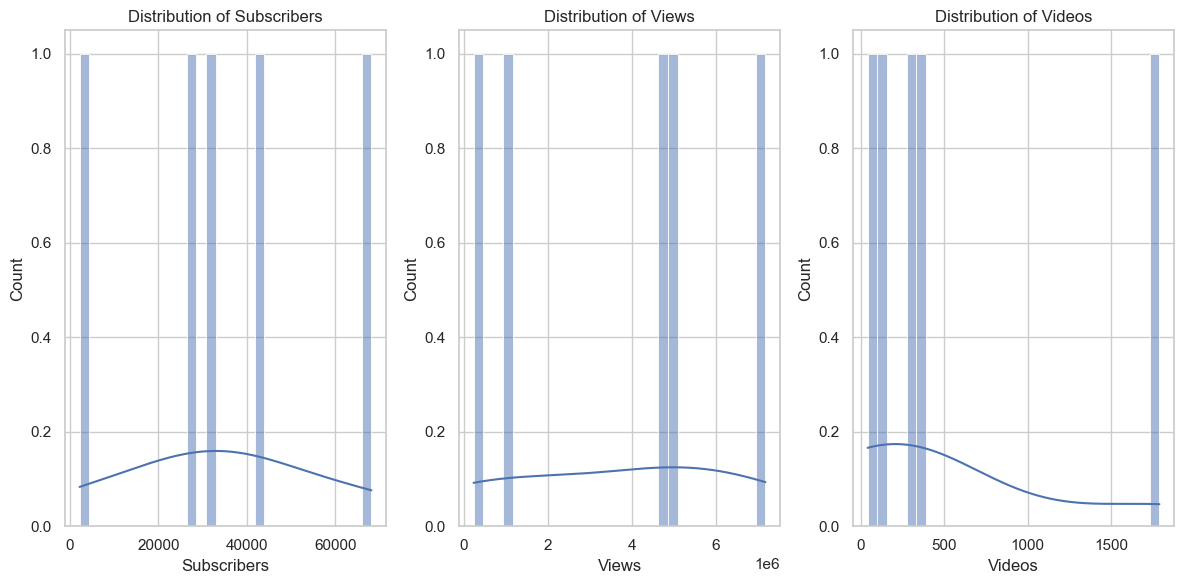

In [118]:
plt.figure(figsize=(12, 6))
# Histogram for Subscribers
plt.subplot(1, 3, 1)
sns.histplot(df['Subscribers'], bins=30, kde=True)
plt.title('Distribution of Subscribers')

# Histogram for Views
plt.subplot(1, 3, 2)
sns.histplot(df['Views'], bins=30, kde=True)
plt.title('Distribution of Views')

# Histogram for Videos
plt.subplot(1, 3, 3)
sns.histplot(df['Videos'], bins=30, kde=True)
plt.title('Distribution of Videos')

plt.tight_layout()
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

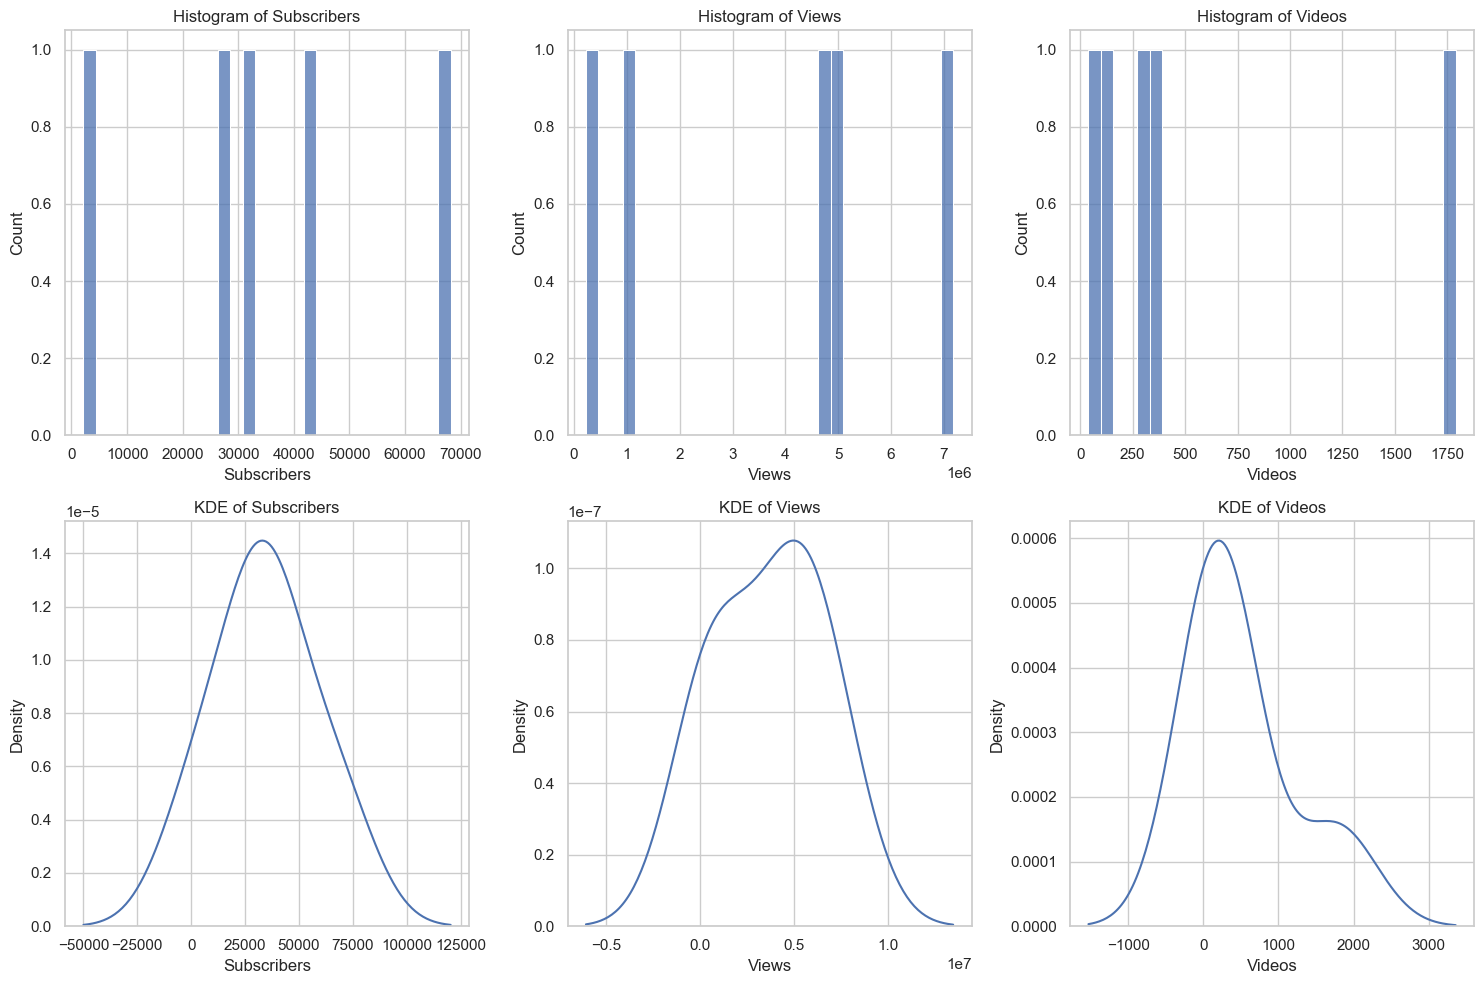

In [119]:
#SEPARATE HISTOGRAMS & KDEs
# Creating a figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Histogram for Subscribers
sns.histplot(df['Subscribers'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Subscribers')

# KDE for Subscribers
sns.kdeplot(df['Subscribers'], ax=axes[1, 0])
axes[1, 0].set_title('KDE of Subscribers')

# Histogram for Views
sns.histplot(df['Views'], bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Views')

# KDE for Views
sns.kdeplot(df['Views'], ax=axes[1, 1])
axes[1, 1].set_title('KDE of Views')

# Histogram for Videos
sns.histplot(df['Videos'], bins=30, ax=axes[0, 2])
axes[0, 2].set_title('Histogram of Videos')

# KDE for Videos
sns.kdeplot(df['Videos'], ax=axes[1, 2])
axes[1, 2].set_title('KDE of Videos')

plt.tight_layout()
plt.show()

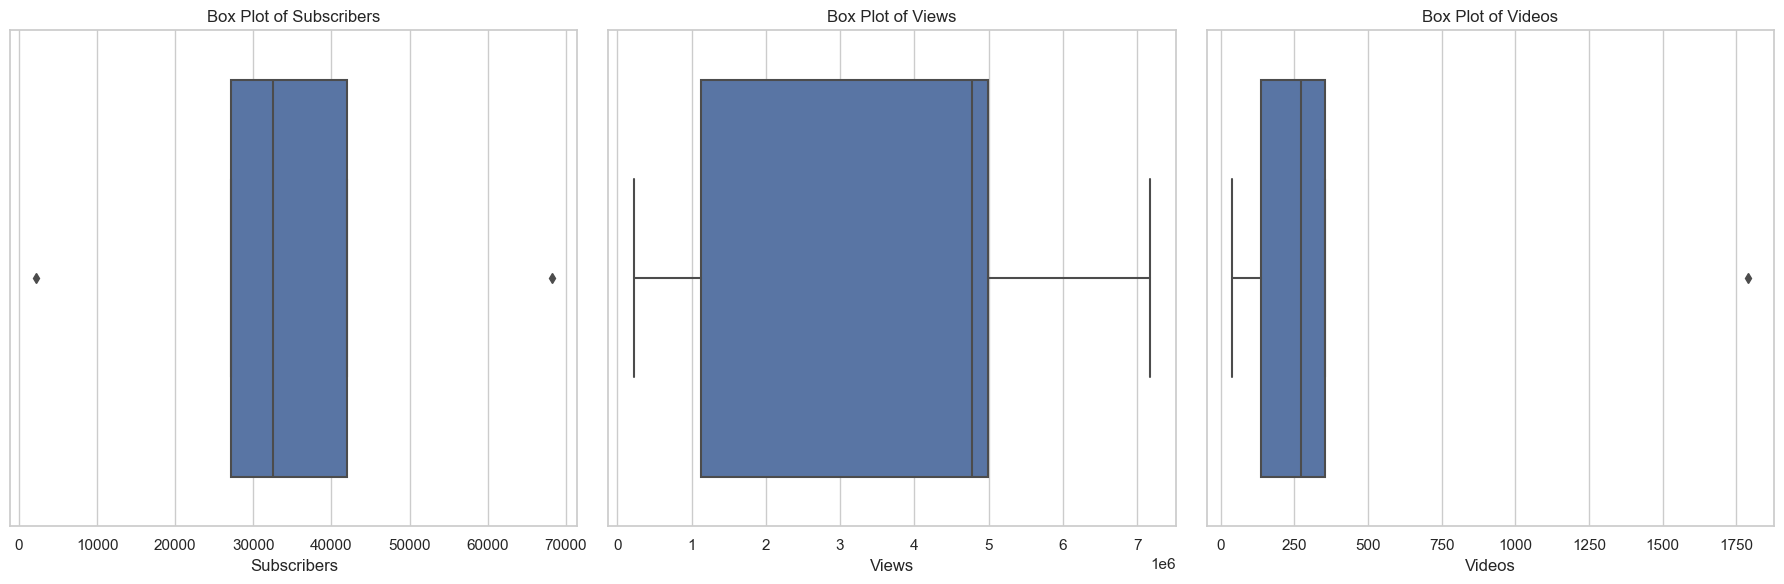

In [120]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for Subscribers
sns.boxplot(data=df, x='Subscribers', ax=axes[0])
axes[0].set_title('Box Plot of Subscribers')
axes[0].set_xlabel('Subscribers')

# Box plot for Views
sns.boxplot(data=df, x='Views', ax=axes[1])
axes[1].set_title('Box Plot of Views')
axes[1].set_xlabel('Views')

# Box plot for Videos
sns.boxplot(data=df, x='Videos', ax=axes[2])
axes[2].set_title('Box Plot of Videos')
axes[2].set_xlabel('Videos')

# Adjust the layout
plt.tight_layout()
plt.show()


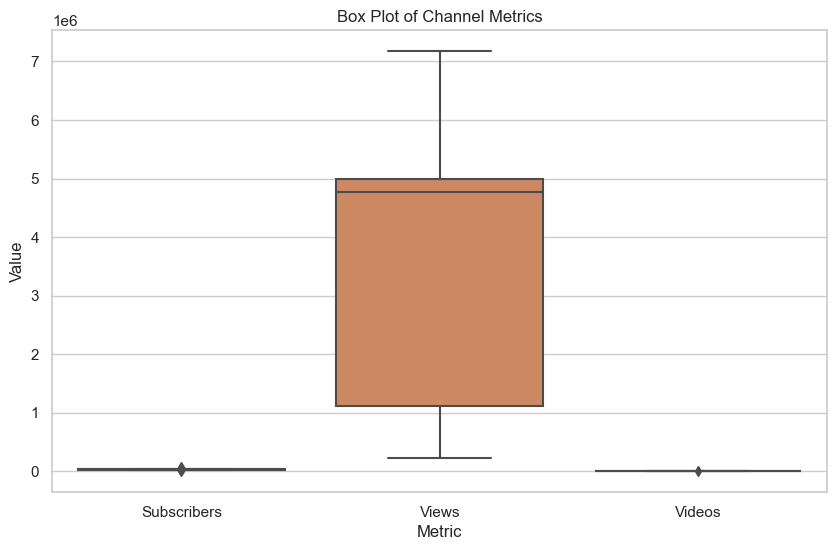

In [121]:
df_melted = df.melt(value_vars=['Subscribers', 'Views', 'Videos'], 
                                  var_name='Metric', value_name='Value')

# Set the style for seaborn
sns.set(style="whitegrid")

# Create the combined box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='Metric', y='Value')

# Add titles and labels
plt.title('Box Plot of Channel Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')

plt.show()

In [122]:
# Print all column names to check if 'publishedAt' exists
print("Columns in the dataframe:", df.columns)

# Look at the first few rows to verify the data
print(df.head())


Columns in the dataframe: Index(['Channel ID', 'Channel Title', 'description', 'Subscribers', 'Views',
       'Videos', 'publishedAt'],
      dtype='object')
                 Channel ID  \
0  UCBXe79nnuPRYci4acLafjHA   
1  UCLEbibgwOY787d16dXshmbg   
2  UCn0gL0gaCE9Moxe0UFIruzw   
3  UCXuseB7juWB7DIgTJcwtHFQ   
4  UCR3vMYVjtOA9vg_gLnjU9Aw   

                                       Channel Title  \
0                                 Auto Konnekt Kenya   
1              Judicial Service Commission of Kenya    
2  Betty's Stories From Kenya(Истории Бетти из Ке...   
3                                Parliament of Kenya   
4                                 twinshangout kenya   

                                         description  Subscribers    Views  \
0  We are all about cars. An alluring motor vehic...        32500  1122964   
1  The Judicial Service Commission (JSC) of Kenya...         2150   225386   
2  Привет ! Меня зовут Беатрис ,я кенийка .Этот б...        27100  4989815   
3  Thi

In [123]:
# Reset the index to make 'publishedAt' a column
df.reset_index(inplace=True)

# Convert 'publishedAt' to datetime again in case it isn't already
df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')

# Check for missing values in 'publishedAt'
missing_count = df['publishedAt'].isna().sum()
print(f"Number of missing dates: {missing_count}")

# Fill missing dates with the mean date
mean_date = df['publishedAt'].mean()
df['publishedAt'].fillna(mean_date, inplace=True)

# Verify the changes
print(df[['publishedAt']].head())


Number of missing dates: 2
                       publishedAt
0 2024-03-16 09:33:42.663053+00:00
1 2022-09-20 10:12:37.973086+00:00
2 2021-01-07 18:19:32.348277+00:00
3 2022-08-25 12:41:57.661472+00:00
4 2022-08-25 12:41:57.661472+00:00


In [130]:
print(df.columns)

Index(['index', 'Channel ID', 'Channel Title', 'description', 'Subscribers',
       'Views', 'Videos'],
      dtype='object')


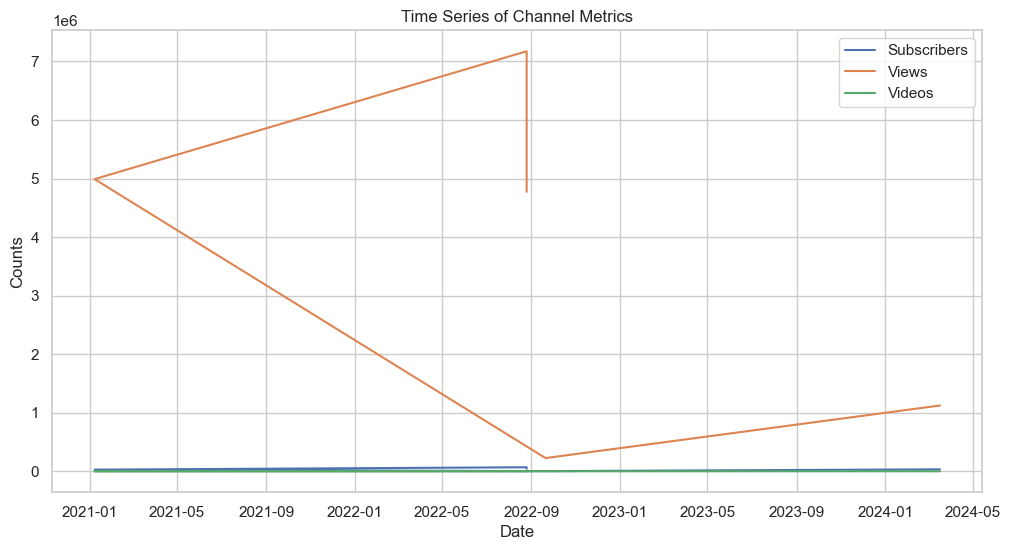

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Subscribers'], label='Subscribers')
plt.plot(df.index, df['Views'], label='Views')
plt.plot(df.index, df['Videos'], label='Videos')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.title('Time Series of Channel Metrics')
plt.legend()
plt.show()


In [134]:
# Compute the correlation matrix
correlation_matrix = df[['Subscribers', 'Views', 'Videos']].corr()

# Print the correlation matrix
print(correlation_matrix)


             Subscribers     Views    Videos
Subscribers     1.000000  0.839199  0.803104
Views           0.839199  1.000000  0.777580
Videos          0.803104  0.777580  1.000000


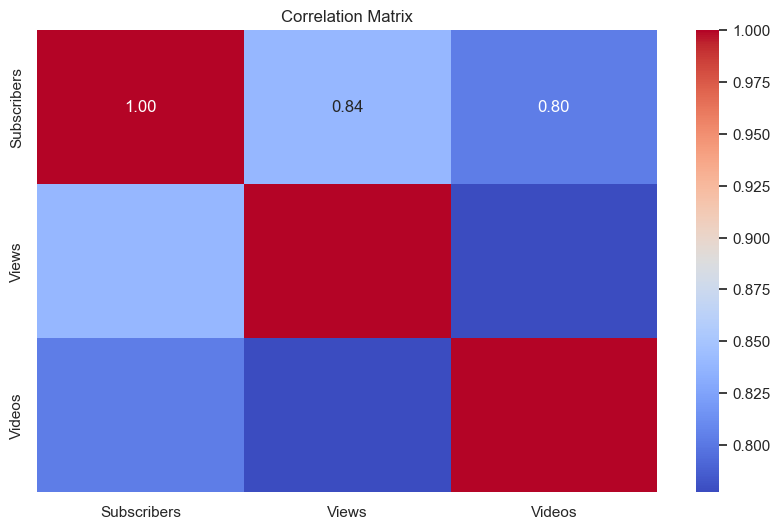

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


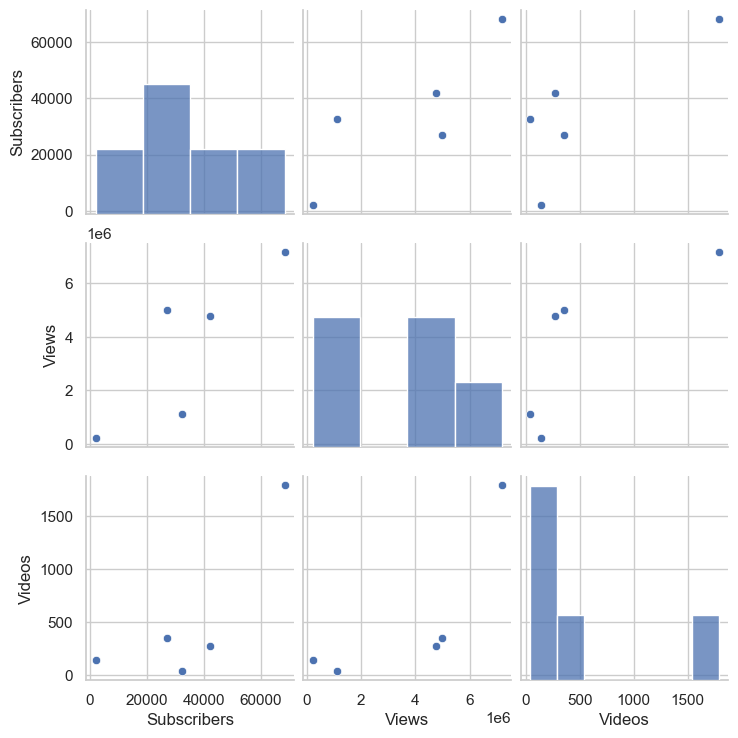

In [136]:
# Pairwise plots
sns.pairplot(df[['Subscribers', 'Views', 'Videos']])
plt.show()
